In [6]:
from plotnine import *
from plotnine.data import mpg
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import animation
import matplotlib.pyplot as plt

In [185]:
madrid_transactions=pd.read_csv('madrid_transactions_country05.12.2022.csv',sep=';')
madrid_transactions['country-category']=madrid_transactions['country_name']+'-'+madrid_transactions['category']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
category_q1=madrid_transactions.groupby(['category']).amount.quantile(q=0.25)
category_q3=madrid_transactions.groupby(['category']).amount.quantile(q=0.75)
madrid_transactions=madrid_transactions.merge(category_q1,on='category',how='left',suffixes=('','cat_q1'))
madrid_transactions=madrid_transactions.merge(category_q3,on='category',how='left',suffixes=('','cat_q3'))
madrid_transactions['Cat_IQR']=madrid_transactions['amountcat_q3']-madrid_transactions['amountcat_q1']
madrid_transactions['Cat_low_IQR']=madrid_transactions['Median Category']-(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_high_IQR']=madrid_transactions['Median Category']+(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_Outliers']=np.where((madrid_transactions['amount']<madrid_transactions['Cat_low_IQR']) \
                                             |(madrid_transactions['amount']>madrid_transactions['Cat_high_IQR']),\
                                             'Outlier','')
madrid_transactions=madrid_transactions[madrid_transactions['Cat_Outliers']=='']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
madrid_transactions['Amount_Ctry_Cat']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.sum)



In [171]:
madrid_transactions

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Date_new,numericcode,...,Median Category-Country,Median Country,Median Category,amountcat_q1,amountcat_q3,Cat_IQR,Cat_low_IQR,Cat_high_IQR,Cat_Outliers,Amount_Ctry_Cat
0,1,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday,01.03.12 21:51,826,...,32.900,35.00,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,10817.71
1,2,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday,02.03.12 16:12,826,...,32.900,35.00,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,10817.71
2,3,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday,02.03.12 17:34,156,...,45.830,39.95,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,8125.40
3,4,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday,01.03.12 17:43,826,...,32.900,35.00,35.99,22.965,83.9600,60.9950,-48.64250,134.34250,,10817.71
4,5,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday,01.03.12 22:47,208,...,17.825,32.27,26.00,13.750,77.4725,63.7225,-62.58375,128.58375,,1271.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10785,10786,100.00,Other goods and services,GB,Evening,19,2012-03-02 19:12:49+00,friday,02.03.12 19:12,826,...,85.000,35.00,61.00,30.000,158.1500,128.1500,-122.22500,262.22500,,2590.50
10786,10787,19.10,Bars & restaurants,FR,Evening,19,2012-03-02 19:22:27+00,friday,02.03.12 19:22,250,...,28.350,30.92,26.00,13.750,77.4725,63.7225,-62.58375,128.58375,,10448.99
10788,10789,79.33,Bars & restaurants,IN,Night,21,2012-03-02 21:22:51+00,friday,02.03.12 21:22,356,...,16.900,29.90,26.00,13.750,77.4725,63.7225,-62.58375,128.58375,,631.15
10789,10790,77.70,Bars & restaurants,US,Night,22,2012-03-02 22:42:09+00,friday,02.03.12 22:42,840,...,18.775,27.00,26.00,13.750,77.4725,63.7225,-62.58375,128.58375,,16275.73


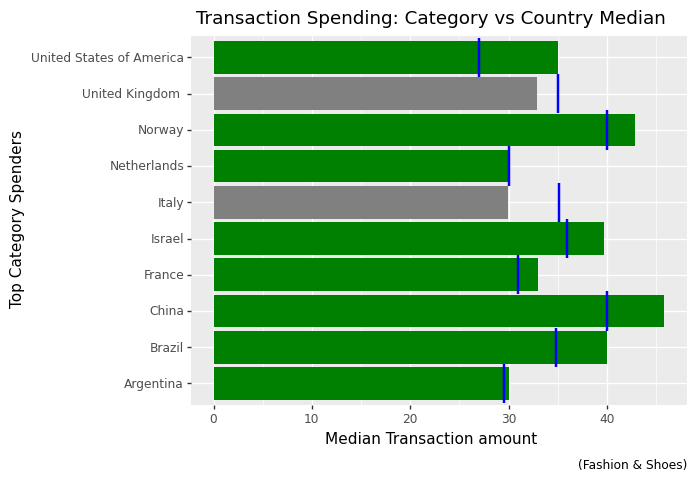

<ggplot: (185918477821)>

In [180]:
Category='Fashion & Shoes'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_name','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_name',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_name','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_name',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")





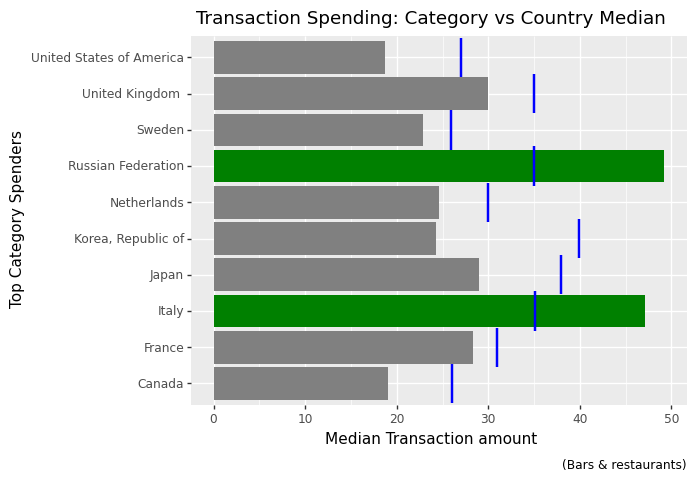

<ggplot: (185918690789)>

In [181]:
Category='Bars & restaurants'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_name','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_name',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_name','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_name',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")


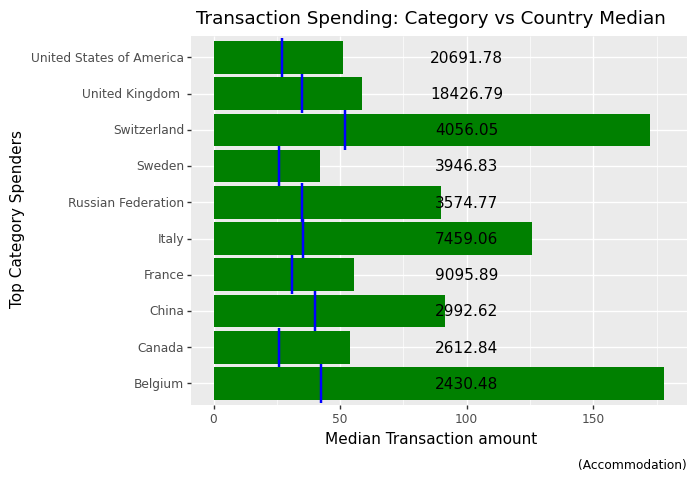

<ggplot: (185918735592)>

In [182]:
Category='Accommodation'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_name','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_name',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_name','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_name',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")



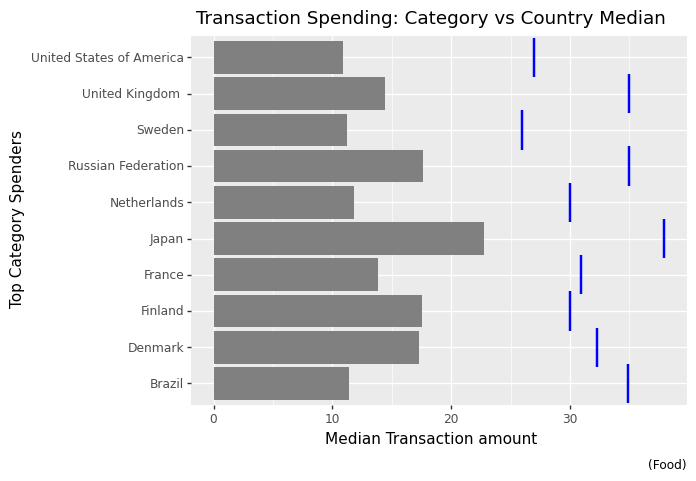

<ggplot: (185918861692)>

In [183]:
Category='Food'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_name','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_name',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_name','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_name',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")



In [106]:
Transaction_value

,category,customer_country,Median Category-Country,Median Country,color,preference
0,Bars & restaurants,AE,146.95,144.190,green,Prefered
1,Bars & restaurants,CL,193.74,64.350,green,Prefered
2,Bars & restaurants,GE,238.50,96.800,green,Prefered
3,Bars & restaurants,HU,140.00,25.950,green,Prefered
4,Bars & restaurants,JO,437.77,49.500,green,Prefered
5,Bars & restaurants,KY,251.55,251.550,grey,
6,Bars & restaurants,LT,176.88,29.925,green,Prefered
7,Bars & restaurants,MY,151.25,69.850,green,Prefered
8,Bars & restaurants,OM,132.65,114.325,green,Prefered
9,Bars & restaurants,ZA,225.70,45.980,green,Prefered


In [78]:
label_df=Transaction_value[['customer_country','Median Category-Country']]
label_df['Median Category-Country']=label_df['Median Category-Country']
label_df['label']='n='+label_df['Median Category-Country'].astype('str')
label_df


C:\Users\SANZ~1.JOR\AppData\Local\Temp/ipykernel_17396/811248155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_country,Median Category-Country,label
0,AE,147.640,n=147.64
1,BW,133.325,n=133.325
2,ID,130.775,n=130.775
3,KY,250.410,n=250.41
4,MN,129.270,n=129.26999999999998
5,MZ,195.375,n=195.375
6,TH,292.850,n=292.85
7,UG,162.450,n=162.45
8,VN,648.525,n=648.525
9,ZW,127.000,n=127.0


In [66]:
label_df=Transaction_value[['customer_country','Median Category-Country']].groupby(['customer_country']).count().reset_index()
label_df['label']='n='+label_df['Median Category-Country'].astype('str')
label_df


,customer_country,Median Category-Country,label
0,AE,1,n=1
1,BW,1,n=1
2,ID,1,n=1
3,KY,1,n=1
4,MN,1,n=1
5,MZ,1,n=1
6,TH,1,n=1
7,UG,1,n=1
8,VN,1,n=1
9,ZW,1,n=1


### Animations: Bar Races

### Top Country Spenders by the hour

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipyk

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1550227067.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

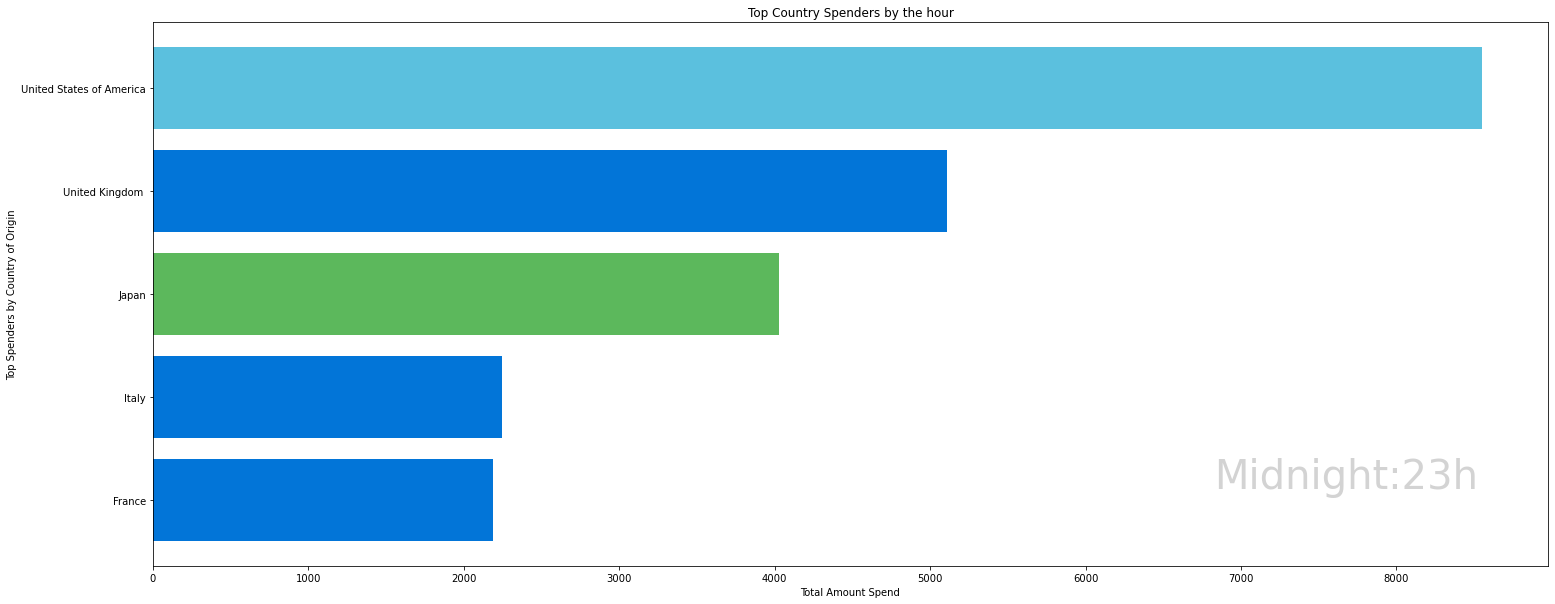

In [85]:
transaction_per_hour=madrid_transactions.groupby (['hour','customer_country','country_name','region'])['amount'].sum()
transaction_per_hour=transaction_per_hour.reset_index()

barchartrace_data  =transaction_per_hour.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', ['customer_country','country_name'], 'amount')
barchartrace_data['hour'] = barchartrace_data.index

barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))

barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name =['customer_country','country_name'], value_name  = 'amount')



import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()

label = ax.text(0.95, 0.20, hours[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
continent = transaction_per_hour[['customer_country','region']].drop_duplicates().reset_index(drop = True)

# # 2. Add continent info
barchartrace_data = barchartrace_data.merge(continent,left_on = 'customer_country', right_on = 'customer_country')
conditions = [
          barchartrace_data['region'] == 'Europe',
          barchartrace_data['region'] == 'Asia',
          barchartrace_data['region'] == 'Americas',
          barchartrace_data['region'] == 'Oceania',
          barchartrace_data['region'] == 'Africa',
 ]

values = ['#0275d8', '#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f']

barchartrace_data['color'] = np.select(conditions, values)

df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label=data_temp['country_name'],
#            ,color=colors)
            color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Country of Origin")
    plt.xlabel("Total Amount Spend")
    plt.title("Top Country Spenders by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Countries_notransition.gif', fps=10)  

### Top Category-Country Spenders by the hour

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipyk

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\1292475484.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

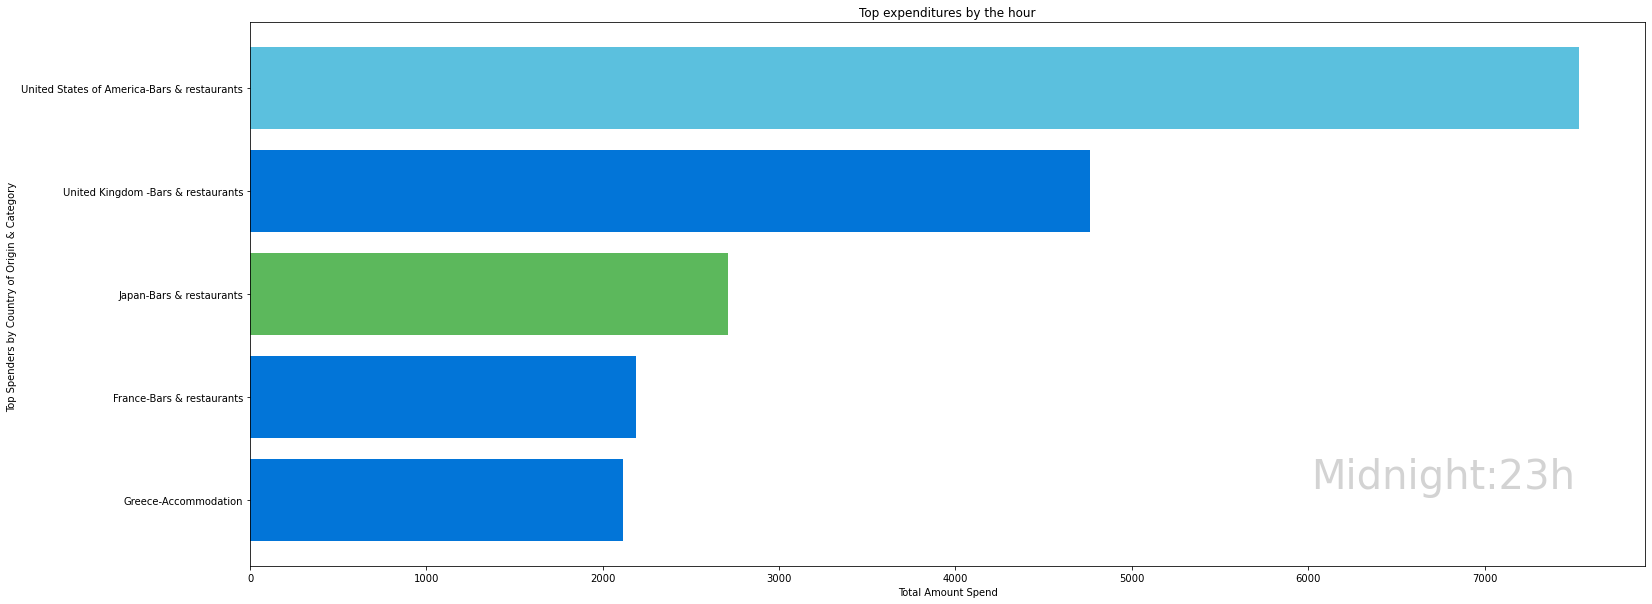

In [78]:
import textwrap

    
transaction_per_hour=madrid_transactions.groupby (['hour','customer_country','country-category','region'])['amount'].sum()
transaction_per_hour=transaction_per_hour.reset_index()
barchartrace_data  =transaction_per_hour.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', ['customer_country','country-category'], 'amount')
barchartrace_data['hour'] = barchartrace_data.index
barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))
barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name =['customer_country','country-category'], value_name  = 'amount')



import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()

label = ax.text(0.95, 0.20, hours[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
continent = transaction_per_hour[['customer_country','region']].drop_duplicates().reset_index(drop = True)

# # 2. Add continent info
barchartrace_data = barchartrace_data.merge(continent,left_on = 'customer_country', right_on = 'customer_country')
conditions = [
          barchartrace_data['region'] == 'Europe',
          barchartrace_data['region'] == 'Asia',
          barchartrace_data['region'] == 'Americas',
          barchartrace_data['region'] == 'Oceania',
          barchartrace_data['region'] == 'Africa',
 ]

values = ['#0275d8', '#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f']

barchartrace_data['color'] = np.select(conditions, values)

df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label= data_temp['country-category'] ,
#            ,color=colors)
            color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Country of Origin & Category ")
    plt.xlabel("Total Amount Spend")
    plt.title("Top expenditures by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Category_Countries_notransition.gif', fps=10)  

### Top Categories by the hour

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipyker

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lapto\AppData\Local\Temp\ipykernel_2288\928462991.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

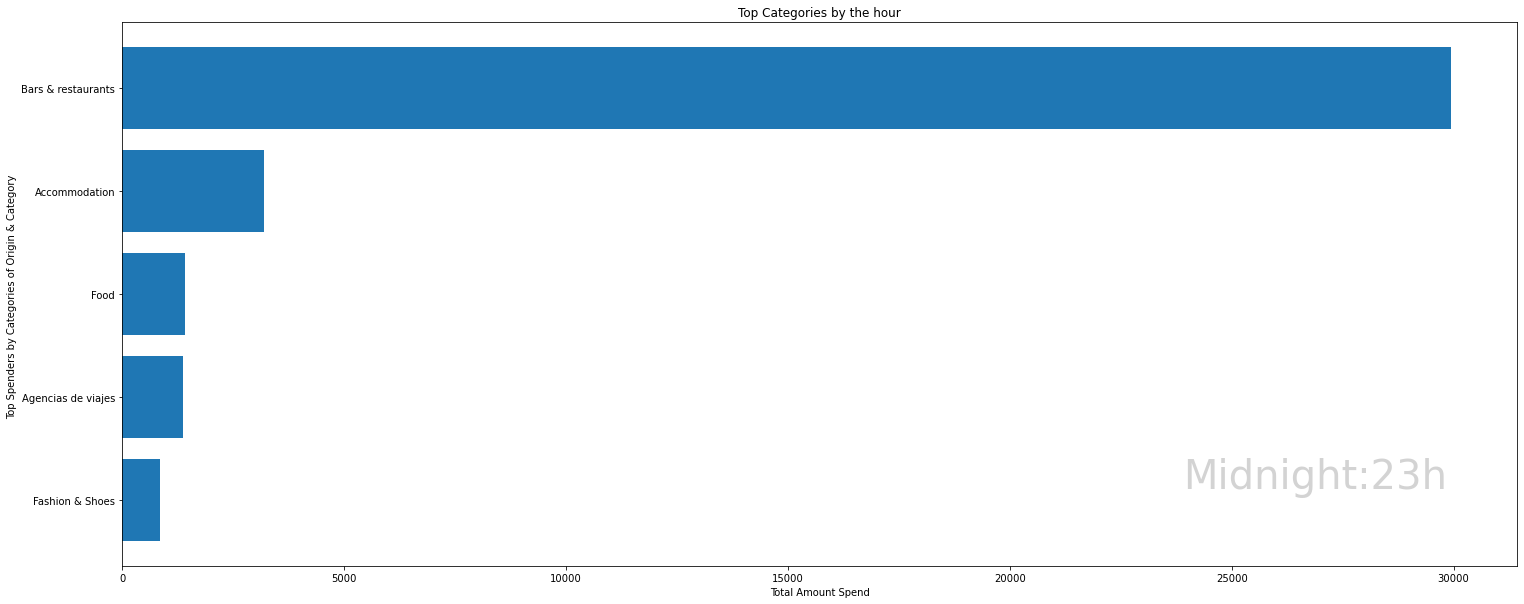

In [82]:
transaction_per_hour_cat=madrid_transactions.groupby (['hour','category'])['amount'].sum()
transaction_per_hour_cat=transaction_per_hour_cat.reset_index()
barchartrace_data  =transaction_per_hour_cat.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', 'category', 'amount')
barchartrace_data['hour'] = barchartrace_data.index

barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))

barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name ='category', value_name  = 'amount')

import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()


df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label= data_temp['category'] )
#            ,color=colors)
#             color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Categories of Origin & Category ")
    plt.xlabel("Total Amount Spend")
    plt.title("Top Categories by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Category_notransition.gif', fps=10)  